In [30]:
import os
import os.path
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [50]:
oDir = "/home/roadelse/Model/AtChem2/AtChem2-1.2.2/model/output"

In [51]:
iDir = f"{oDir}/../configuration"

# read in config

In [52]:
def get_model_parameters(configfile: str) -> dict:
    model_params_lines = [L.split()[0] for L in open(configfile, "r").read().splitlines()]
    keys_by_order = ("nsteps", "dt", "species_interp_method", "condition_interp_method", "dt_out", "starttime", "dt_jacobian_out", "lat", "lon", "day", "month", "year", "dt_rrate_out")
    model_parameters = {keys_by_order[i]:model_params_lines[i] for i in range(len(model_params_lines))}
    return model_parameters

In [64]:
model_parameters = get_model_parameters(f'{iDir}/model.parameters')
model_parameters

{'nsteps': '14400',
 'dt': '300',
 'species_interp_method': '2',
 'condition_interp_method': '2',
 'dt_out': '600',
 'starttime': '0',
 'dt_jacobian_out': '0',
 'lat': '30',
 'lon': '-120',
 'day': '21',
 'month': '06',
 'year': '2019',
 'dt_rrate_out': '600'}

In [55]:
timezone = -float(model_parameters['lon']) / 15
timezone

8.0

In [56]:
startDatetime = datetime.datetime.strptime(f"""{model_parameters['year']}/{model_parameters['month']}/{model_parameters['day']}""", "%Y/%m/%d")
startDatetime += datetime.timedelta(hours=timezone)
startDatetime += datetime.timedelta(seconds=int(model_parameters['starttime']))
startDatetime

datetime.datetime(2019, 6, 21, 8, 0)

# read in output

In [57]:
def get_outdts(reffile: str = 'environmentVariables.output'):
    assert os.path.exists(oDir)
    dfT = pd.read_csv(f'{oDir}/{reffile}', sep='\s+', index_col=0)
    outdts = []
    for t in dfT.index:
        outdts.append(startDatetime + datetime.timedelta(seconds=int(t)))
    return outdts

In [73]:
envvars = ("M", "TEMP", "PRESS", "RH", "H2O", "DEC", "BLHEIGHT", "DILUTE", "JFAC", "ROOF", "ASA", "RO2")
def get_var(varname: str):
    if varname in envvars:
        fileT = f'{oDir}/environmentVariables.output'
        outdts = get_outdts('environmentVariables.output')
    elif varname.startswith("J"):
        fileT = f'{oDir}/photolysisRates.output'
        outdts = get_outdts('photolysisRates.output')
    else:
        fileT = f'{oDir}/speciesConcentrations.output'
        outdts = get_outdts('speciesConcentrations.output')
    
    df = pd.read_csv(fileT, sep='\s+', index_col=0)
    return outdts, df[varname].values

In [68]:
def plot_var(varname):
    xs, ys = get_var(varname)
    
    fig, ax = plt.subplots(figsize = (20, 5))
    ax.plot(xs, ys)
    ylims = ax.get_ylim()
    for i, t in enumerate(xs):
        if xs[i].hour == 0 and xs[i].minute == 0:
            ax.plot([xs[i], xs[i]], ax.get_ylim(), 'k--')
    ax.set_ylim(ylims)

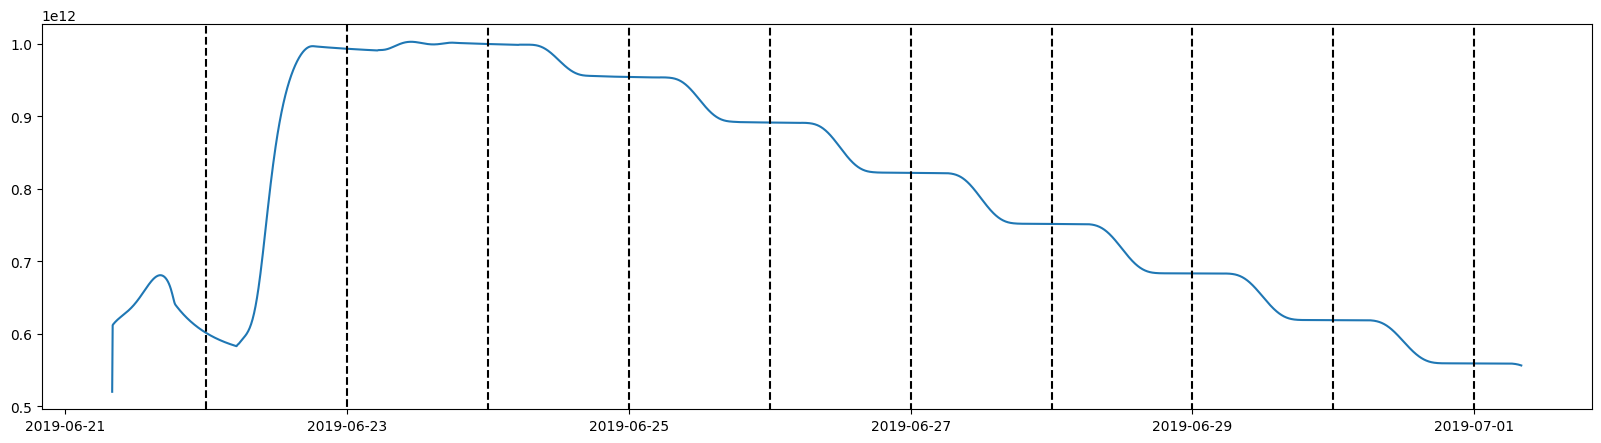

In [80]:
plot_var('O3')

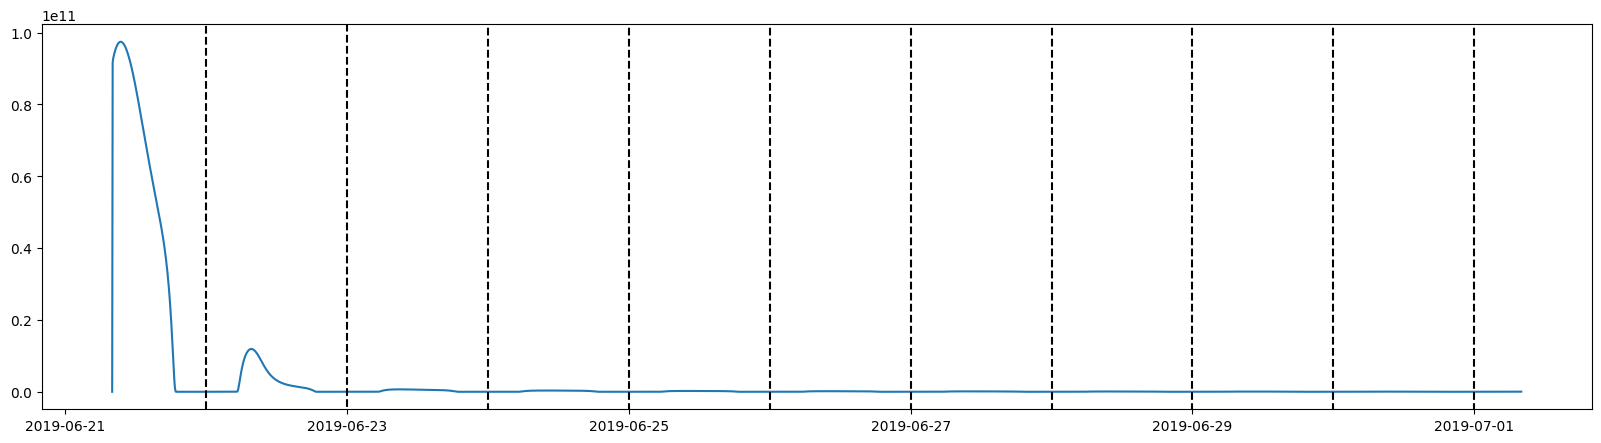

In [78]:
plot_var('NO')

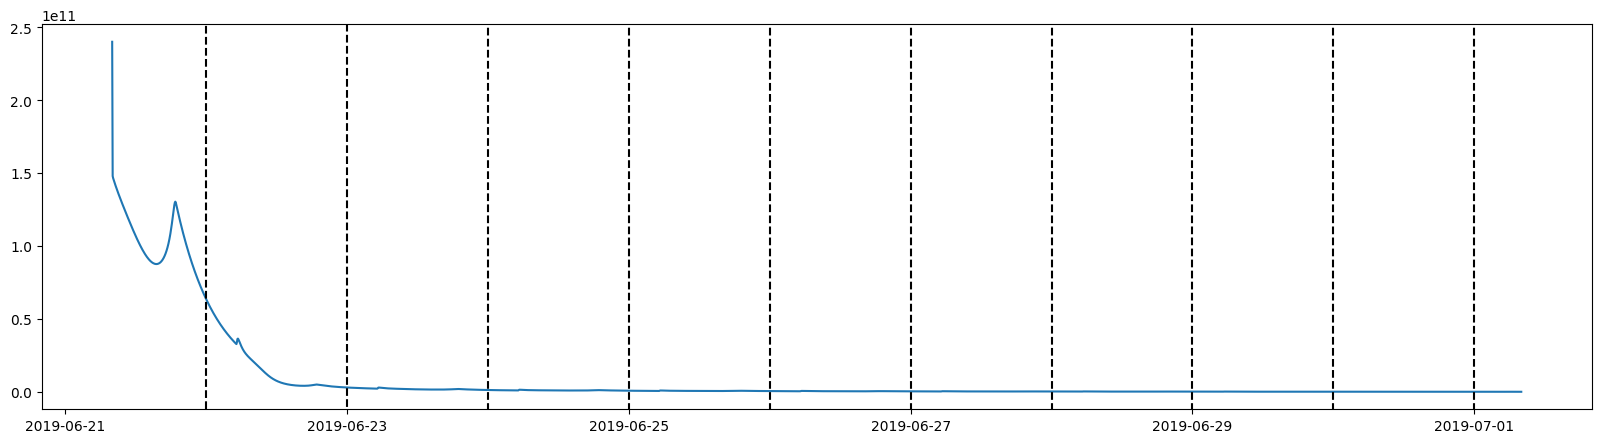

In [79]:
plot_var('NO2')

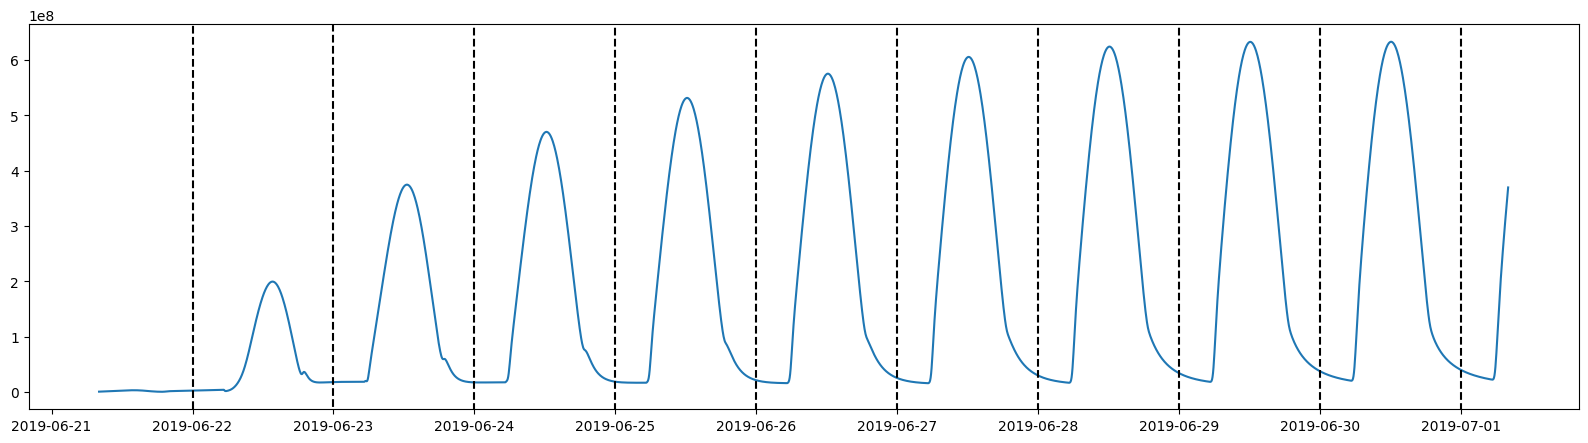

In [72]:
plot_var('RO2')

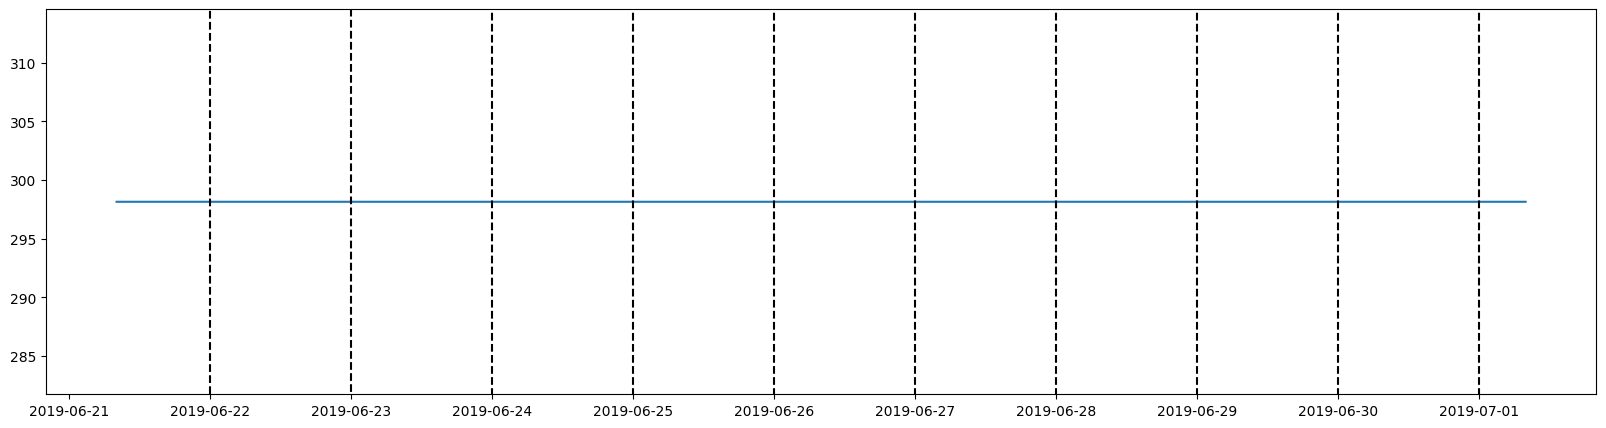

In [77]:
plot_var('TEMP')